# Insurance Cost Prediction using Multiple Linear Regression

## Importing Important Libraries

In [64]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

## Extracting the Dataset

 To load the dataset into memory, we’ll use the read_csv function from the pandas library. The data will be loaded as a Pandas data frame. 

In [65]:
df = pd.read_csv("insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


## Information of Dataset

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Checking for NULL values

In [69]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [70]:
df.values

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.924],
       [18, 'male', 33.77, ..., 'no', 'southeast', 1725.5523],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.462],
       ...,
       [18, 'female', 36.85, ..., 'no', 'southeast', 1629.8335],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.945],
       [61, 'female', 29.07, ..., 'yes', 'northwest', 29141.3603]],
      dtype=object)

## Exploratory Data Analysis

Let’s create some simple plots to check out the data.

### Pair Plotting

 We now explore the relation between the features given and the insurance costs. The regression plots in seaborn are intended to add a visual guide that helps to emphasize patterns in a dataset.

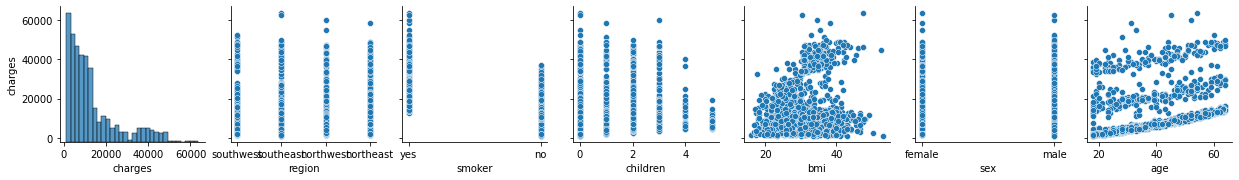

In [71]:
sns.pairplot(df,x_vars=df.columns[::-1],y_vars=['charges'])

### Joint Plots

A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Y)

#### 1. Correlation betweeen 'charges' and 'age' 

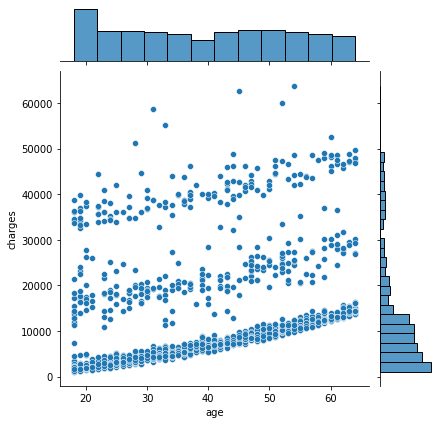

In [72]:
sns.jointplot(x=df['age'],y=df['charges'])

Here we see that as 'age' goes up, 'charges' for health insurance also trends up

#### 2. Correlation betweeen 'charges' and 'smoker' 

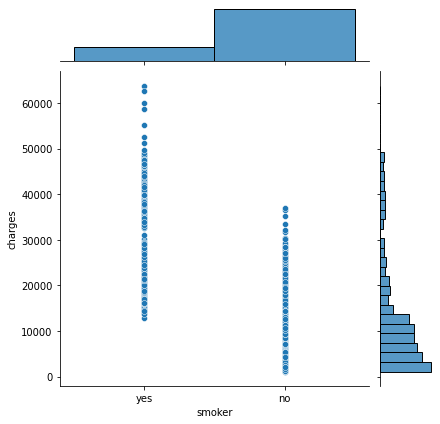

In [73]:
sns.jointplot(x=df['smoker'],y=df['charges'])

Here, we see that charges for smokers are higher than non-smokers.

### Displot

Python Seaborn module contains various functions to plot the data and depict the data variations. The seaborn.displot() function is used to plot the displot. The displot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

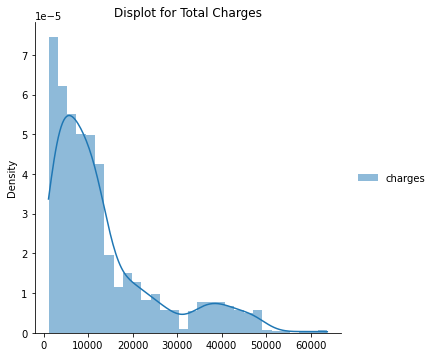

In [74]:
# How the charges are distributed according to given factors

data_charges = pd.DataFrame(df['charges'])
res = sns.displot(data_charges,kde=True, stat="density", linewidth=0)
plt.title("Displot for Total Charges")
plt.show()

### Barplot

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

<AxesSubplot:xlabel='charges', ylabel='region'>

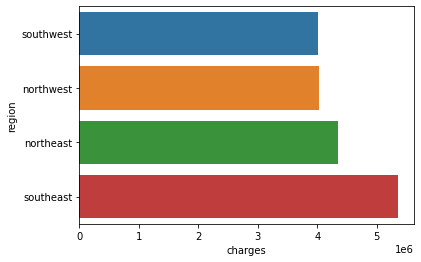

In [76]:
# The charges by region

charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
sns.barplot(x=charges.head(),y=charges.head().index)

 Overall, the highest medical charges are in the Southeast and the lowest are in the Southwest.

## Data Cleaning

### Detecting and Removing the Outliers


<AxesSubplot:>

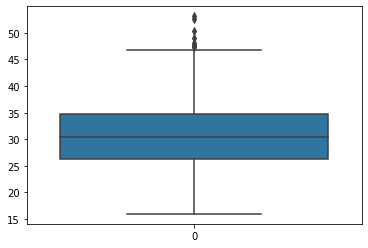

In [77]:
# Box Plot 
import seaborn as sns
sns.boxplot(data=df['bmi'])

 In the above graph, can clearly see that values above 46 are acting as the outliers

In [78]:
# Position of the Outlier
print(np.where(df['bmi']>46))

(array([ 116,  286,  401,  438,  454,  543,  547,  549,  660,  847,  860,
        930,  941, 1047, 1088, 1317], dtype=int64),)


In [79]:
# Removing the Outliers
df.drop([ 116,  286,  401,  438,  454,  543,  547,  549,  660,  847,  860,
        930,  941, 1047, 1088, 1317], inplace = True)

### Correlation Matrix

 Compare the correlation between features and remove one of two features that have a correlation higher than 0.9

<AxesSubplot:>

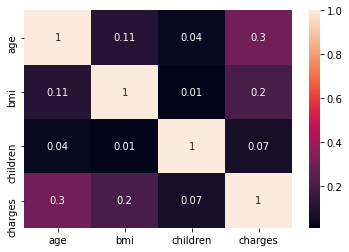

In [80]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

 All the correlation values are less than 0.9, so nothing has to be removed. The very small values in this table indicate that there is no multicollinearity between our variables, so this is not something that needs to be factored into the model.

## Categorical Values

 By looking at our dataset we see that columns: ‘sex’, ‘smoker’ and ‘region’ are in string format, so we can work on converting them to numerical values

In [81]:
print(df['smoker'].value_counts())
print(df['sex'].value_counts())
print(df['region'].value_counts())

no     1052
yes     270
Name: smoker, dtype: int64
male      667
female    655
Name: sex, dtype: int64
southeast    351
northwest    325
southwest    323
northeast    323
Name: region, dtype: int64


In [82]:
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1322 rows x 7 columns]


## Encoding of Categorical Values

 Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated.

In [83]:
label_encoder = LabelEncoder()
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['region']= label_encoder.fit_transform(df['region'])
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1322 rows x 7 columns]


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1322 non-null   int64  
 1   sex       1322 non-null   int32  
 2   bmi       1322 non-null   float64
 3   children  1322 non-null   int64  
 4   smoker    1322 non-null   int32  
 5   region    1322 non-null   int32  
 6   charges   1322 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.1 KB


In [85]:
print(df['smoker'].value_counts())
print(df['sex'].value_counts())
print(df['region'].value_counts())

0    1052
1     270
Name: smoker, dtype: int64
1    667
0    655
Name: sex, dtype: int64
2    351
1    325
0    323
3    323
Name: region, dtype: int64


<AxesSubplot:>

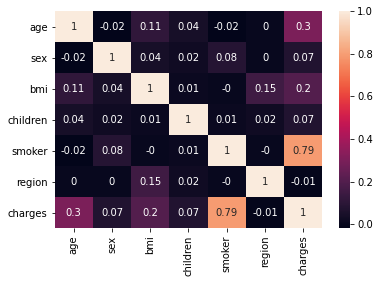

In [86]:
# Correlation Matrix
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

## Training a Linear Regression Model

### Seperating the Target from DataFrame

First we will split our data into ‘x’ array that contains the features and a ‘y’ array with the target variable

In [87]:
# Data Preparation

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print("X:\n",x)
print()
print("Y:\n",y)

X:
 [[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]

Y:
 [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


### Splitting the Dataset into Training and Testing

 Next we will split our dataset (insurance.csv) into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=2)
print("X Train: ",x_train.shape)
print("X Test:  ",x_test.shape)
print("Y Train: ",y_train.shape)
print("Y Test:  ",y_test.shape)
print(x_train)

X Train:  (991, 6)
X Test:   (331, 6)
Y Train:  (991,)
Y Test:   (331,)
[[59.     1.    31.79   2.     0.     2.   ]
 [42.     0.    33.155  1.     0.     0.   ]
 [37.     0.    30.78   0.     1.     0.   ]
 ...
 [44.     0.    23.98   2.     0.     2.   ]
 [59.     1.    29.7    2.     0.     2.   ]
 [36.     1.    33.4    2.     1.     3.   ]]


‘test_size’ represents that 30% of the data goes to the test data and the rest to the training set. Setting random state as an integer, train_test_split will return same results for each execution.

### Building a MLR Model

In [89]:
# Building the Linear Regression Model
lr=LinearRegression()
# Fit linear model by passing training dataset
lr.fit(x_train,y_train)

LinearRegression()

## P-Values

 Now, we summarize the regressor and check the p-values to find the independent variables that hold the maximum statistical significance.

In [90]:
X_opt = np.array(x_train[:,[0, 1,2, 3,4,5]]).astype(float)
X2 = sm.add_constant(X_opt)
regressor_OLS = sm.OLS(y_train,X2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     473.6
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          4.87e-286
Time:                        00:29:18   Log-Likelihood:                -10049.
No. Observations:                 991   AIC:                         2.011e+04
Df Residuals:                     984   BIC:                         2.015e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.228e+04   1180.208    -10.408      0.000   -1.46e+04   -9967.375
x1           261.0408     14.118     18.490      0.000     233.336     288.745
x2           119.8162    393.218      0.305      0.761    -651.826     891.458
x3           346.8145     34.726      9.987      0.000     278.670     414.959
x4           457.3392    163.004      2.806      0.005     137.464     777.215
x5          2.347e+04    482.064     48.691      0.000    2.25e+04    2.44e+04
x6          -357.2788    178.406     -2.003      0.045    -707.379      -7.178
==============================================================================
Omnibus:                      223.732   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              485.840
Skew:                           1.249   Prob(JB):                    3.17e-106
Kurtosis:                       5.351   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Due to a relatively higher p-value, we can conclude that sex of a beneficiary and beneficiary's residential area don't really play a significant role in determining their insurance charges as they are not statistically significant.

## Model Evaluation

In [91]:
# Model Evaluation for Testing Set

y_pred = lr.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test,y_pred)
print("The Model Performance for Testing Set:")
print("\n")
print('RMSE is {:.2f}'.format(rmse))
print('MSE is {:.2f}'.format(mse))
print('R2 score is {:.2f}'.format(r2))

The Model Performance for Testing Set:


RMSE is 5560.00
MSE is 30913638.40
R2 score is 0.77


## Actual and Predicted Values

We are using 'AvsP_Vals’ variable to store actual and predicted values together which are present in 'y_test' and 'y_test_predict' respectively. 

In [92]:
A_vals=pd.DataFrame(y_test,columns=['Actual'])
P_vals=pd.DataFrame(y_pred,columns=['Predicted'])
AvsP_Vals = pd.concat([A_vals,P_vals], axis=1)
print(AvsP_Vals)

          Actual     Predicted
0     8733.22925  14404.341172
1     4347.02335   6582.669648
2     9861.02500   9363.010520
3     7448.40395  13388.216550
4     8688.85885   8435.956697
..           ...           ...
326   1136.39940   3494.381019
327   8342.90875  13974.807039
328   1621.88270   2497.124041
329  13770.09790  13743.039750
330  21259.37795  31720.626321

[331 rows x 2 columns]


 Here, we see that the differences between the actual and the predicted values are reasonably small.

## Plotting Actual vs Predicted Values

We are using 'scatter()' of mathplotlib.pyplot which is imported as 'plt' to plot the actual and predicted values. 
We are taking the logic into consideration that if both actual and predicted values are same then, the point lies on the line which is passing through origin. 
Hence, the more points near the line the more accurate the model is.

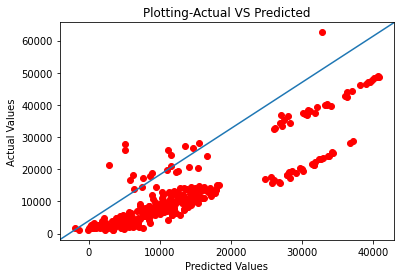

In [93]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(P_vals,A_vals,color='r')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Plotting-Actual VS Predicted")

plt.show()

#### Four Sub-Sections: 
 1: Predicted values (0 to 20000) Actual values (0 to 20000) - The points are nearly close to the diagonal line. <br>
 2: Predicted values (0 and 18000) Actual values (20000 and 35000) - The data points are essentially random. There is virtually no relationship between the model's predicted values and actuals. <br>
 3: Predicted values (20000 and 40000) Actual values (10000 and 25000) - The predicted values are larger than the actual values over the range of 15000-20000. This indicates an overestimation. <br>
 4: Predicted values (28000 and 40000) Actual values (30000 and 50000) - The data points are close to the diagonal line.

## Trying to Predict Insurance Charges

1. We try to predict the insurance costs of a new customer, who is a smoker.

In [94]:
input_data = (45,1,78.78,3,1,3)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)

print('The insurance cost is USD ', np.round(prediction[0]),2)

The insurance cost is USD  50678.0 2


2. We try to predict the insurance cost of another customer, but this time we take all the same values for age, bmi, sex, region and children as the previous customer, and we try to predict the costs if this customer is a non-smoker. 

In [95]:
input_data = (45,1,78.78,3,0,3)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)

print('The insurance cost is USD ', np.round(prediction[0]),2)

The insurance cost is USD  27205.0 2


#### Thus, we can conclude from the costs predicted that the difference between the insurance cost for smokers and non smoker is very high.

## Saving Model with pickle

Pickle is the standard way of serializing objects in Python.

You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file.

Later you can load this file to deserialize your model and use it to make new predictions.

In [96]:
import pickle

In [97]:
pickle.dump(lr,open('MLRModel.pkl','wb'))

# End